In [340]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
import pmdarima as pm
from pmdarima.utils import tsdisplay
from pmdarima.model_selection import train_test_split
from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import LogEndogTransformer, BoxCoxEndogTransformer
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor as gbr

C:\Users\Big Brother\AppData\Local\Temp\ipykernel_21656\4056546496.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfs = {f'{file[0:-4]}_df'.replace('-','_'): pd.read_csv(dir_path+'\\'+file, parse_dates=True, index_col=0) for file in filenames}


dict_keys(['daily_total_female_births_in_cal_df', 'international_airline_passengers_df', 'mean_monthly_air_temperature_deg_df', 'monthly_boston_armed_robberies_j_df', 'monthly_sales_of_company_x_jan_6_df', 'weekly_closings_of_the_dowjones__df'])


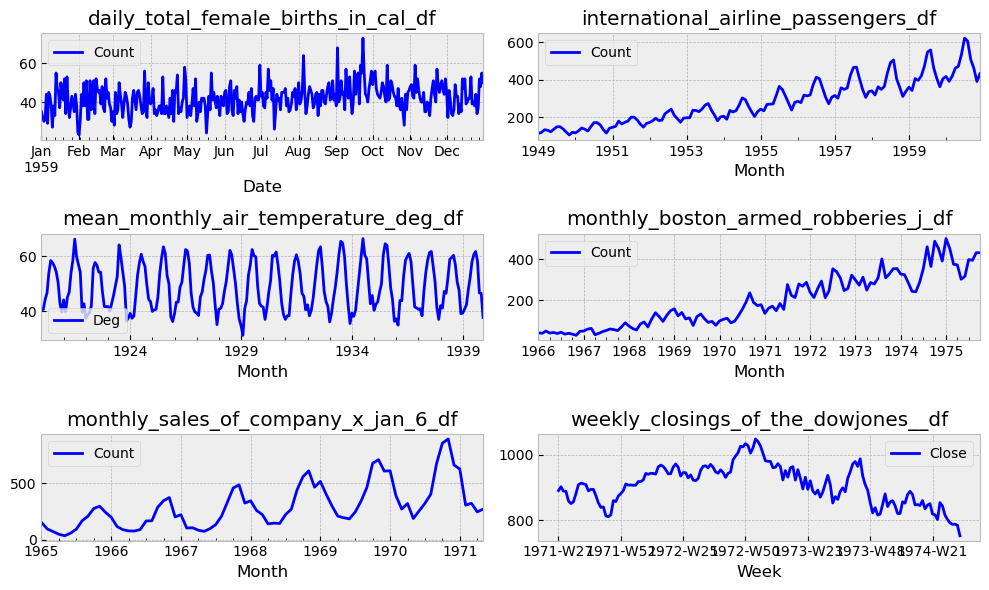

In [341]:
dir_path = r'E:\python_projects\notebooks\timeseries\1._Лекция_tsml\Series'
filenames = os.listdir(dir_path)
dfs = {f'{file[0:-4]}_df'.replace('-','_'): pd.read_csv(dir_path+'\\'+file, parse_dates=True, index_col=0) for file in filenames}
for key, df in dfs.items():
   globals()[key] = df

print(dfs.keys())

with plt.style.context('bmh'):
    plt.figure(figsize=(10, 6))
    layout = (3, 2)
    for i, key in enumerate(dfs.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        dfs[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [342]:
def Dickey_Fuller(timeseries):
    
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    return  dfoutput

def kpss_test(timeseries, regression='c'):
    
    dftest = kpss(timeseries, regression=regression)
    dfoutput = pd.Series(dftest[0:3], index=['Test Statistic', 'p-value', 'Lags Used'])
    for [key, value] in dftest[3].items():
        dfoutput['Critical Value (%s)' % key] = value
    return dfoutput

In [343]:
robberies = dfs['monthly_boston_armed_robberies_j_df']

In [344]:
len(robberies)

118

In [345]:
y = robberies
y_train, y_test = train_test_split(y, train_size = 100)

e:\Anaconda\Lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


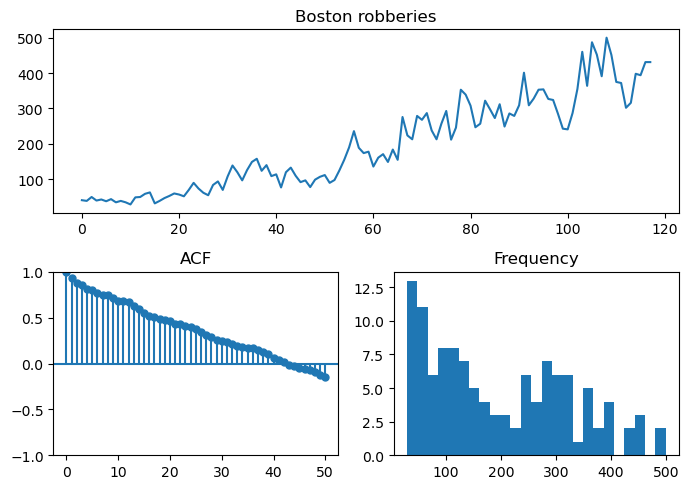

In [346]:
tsdisplay(y, title = 'Boston robberies', figsize = (7,5))

In [347]:
fit1 = pm.auto_arima(y_train, seasonal = False, trace=True, suppress_warnings=True)
fit1.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=972.440, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=985.861, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=981.895, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=975.045, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=984.207, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=971.738, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=970.199, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=972.155, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=970.841, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=973.118, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=972.963, Time=0.03 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 0.573 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -481.100
Date:                Thu, 06 Jun 2024   AIC                            970.199
Time:                        01:48:15   BIC                            980.580
Sample:                    01-01-1966   HQIC                           974.399
                         - 04-01-1974                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8159      0.974      2.890      0.004       0.906       4.726
ma.L1         -0.3980      0.090     -4.411      0.000      -0.575      -0.221
ma.L2         -0.3307      0.106     -3.127      0.002      -0.538      -0.123
sigma2       967.3585    112.012      8.636      0.000     747.819    1186.898
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                24.18
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               8.57   Skew:                             0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

e:\Anaconda\Lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


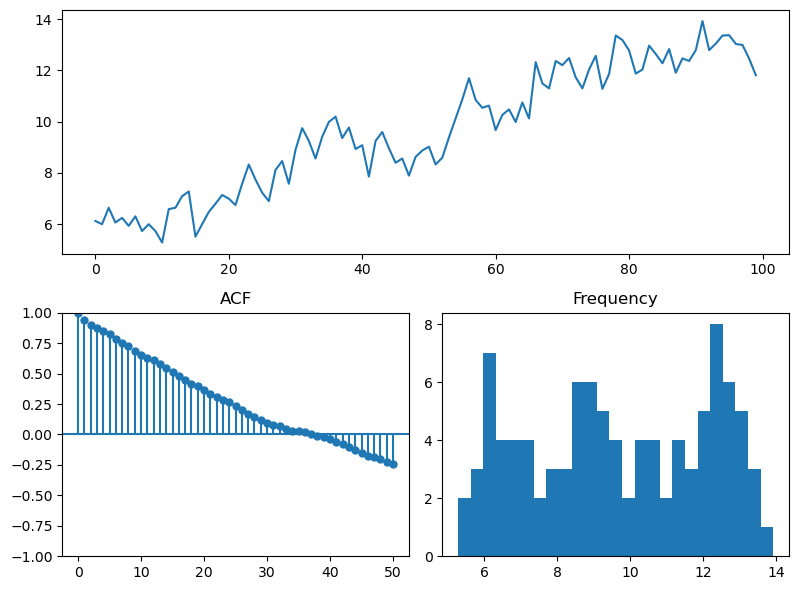

In [348]:
y_train_boxcox, _ = BoxCoxEndogTransformer().fit_transform(y_train)
tsdisplay(y_train_boxcox)


In [349]:
fit2 = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),
    ('arima', pm.AutoARIMA(trace=True,
                           suppress_warnings=True,
                           seasonal = False))
])

fit2.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=215.424, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=212.056, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=206.834, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=214.080, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=203.413, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=205.297, Time=0.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=207.404, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=206.024, Time=0.02 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 0.639 seconds


Pipeline(steps=[('boxcox', BoxCoxEndogTransformer(lmbda2=1e-06)),
                ('arima', AutoARIMA(seasonal=False, trace=True))])

In [350]:
train_predictions = fit2.predict_in_sample()
test_predictions = fit2.predict(len(y_test))
future_predictions = fit2.predict(15)
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

In [351]:
y_train_fit_df = pd.DataFrame(train_predictions, index = y_train.index)
y_test_fit_df = pd.DataFrame(test_predictions, index = y_test.index)

In [352]:
def plot_draw(original_ts, train_predictions, test_predictions, train_mean_mse, test_mean_mse, ts_name):

    fig, (ax0) = plt.subplots(1, 1, figsize = (15, 5))
    ax0.grid(color = 'grey', alpha = 0.7, label = 'Inline Label')
    ax0.plot(original_ts, label = ts_name)
    ax0.plot(train_predictions, label = f'train predictions. train mse: {train_mean_mse}', color = 'green')
    ax0.plot(test_predictions, label = f'test predictions. test mse: {test_mean_mse}', color = 'red')
    ax0.legend(loc = 'lower right')
    plt.show()
    plt.close()
    return

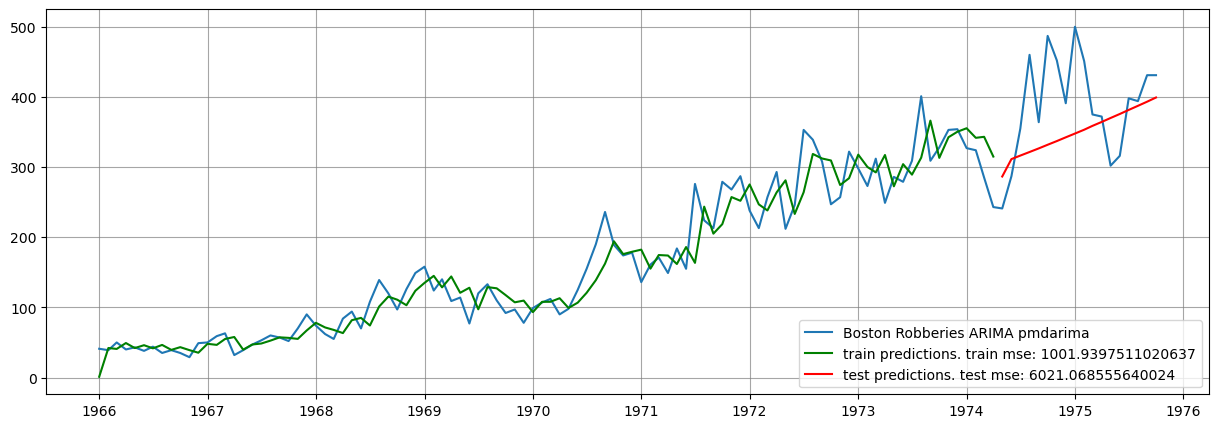

In [353]:
plot_draw(robberies, y_train_fit_df, y_test_fit_df, train_mse, test_mse, 'Boston Robberies ARIMA pmdarima')

- Попытка предсказания ряда с помощью GradientBoostingRegressor
- Метод предобработки ряда взят отсюда: https://www.javatpoint.com/random-forest-for-time-series-forecasting

In [354]:
def series_to_supervised(data, In = 1, out = 1):  
    df = pd.DataFrame(data)  
    columns = list()  
    for _ in range(In, 0, -1):  
        columns.append(df.shift(_))  
    for val in range(0, out):  
        columns.append(df.shift(-val))  
    df = pd.concat(columns, axis = 1)
    df.dropna(inplace = True)
    return df.values 

def train_test_split(data, n):  
    train_data = data[:-n]
    test_data = data[-n:]
    return train_data, test_data

def gb_regressor(train, test_x):  
    train = np.asarray(train)
    x_train, y_train = train[:, : -1], train[:, -1]  
  
    model = gbr(learning_rate = 0.05,
                n_estimators = 250,
                random_state = 101,
                verbose = 1,
                n_iter_no_change = 4)  
  
    model.fit(x_train, y_train)  
  
    y_pred = model.predict([test_x])  
    return y_pred[0] 

def walk_forward_validation(data, test_n):  
    forecast = []  
    train, test = train_test_split(data, test_n)  
    historical = [x for x in train]  
    for i in range(len(test)):   
        test_x, test_y = test[i, :-1], test[i, -1]  

        y_pred = gb_regressor(historical, test_x)  
        forecast.append(y_pred)
        historical.append(test[i])  

        if len(forecast) > 1: 
            error_term = mean_squared_error(test[:i+1, -1], forecast[:i+1])
            print(f'Window {i}: expected values = {test_y}, predicted values = {y_pred}, MSE = {error_term}')

    return error_term, test[:, 1], forecast, train


In [355]:
robberies_sup = series_to_supervised(robberies.values, In = 3)
mse, y_true, y_pred, train = walk_forward_validation(robberies_sup, 24)

      Iter       Train Loss   Remaining Time 
         1        8316.5177            0.00s
         2        7563.7900            0.12s
         3        6882.3007            0.08s
         4        6267.2186            0.06s
         5        5712.0413            0.11s
         6        5209.7823            0.09s
         7        4753.3372            0.08s
         8        4342.8781            0.10s
         9        3967.5217            0.09s
        10        3631.2583            0.10s
        20        1576.5720            0.08s
        30         790.0019            0.08s
        40         474.3553            0.07s
        50         319.3561            0.07s
        60         237.2972            0.07s
      Iter       Train Loss   Remaining Time 
         1        9067.3218            0.00s
         2        8253.7472            0.00s
         3        7517.6101            0.08s
         4        6853.2463            0.06s
         5        6253.8050            0.05s
        

In [356]:
for i in range(len(robberies.iloc[:-24])):
    np.insert(y_pred, 0, np.nan)

In [357]:
nan_count = len(robberies.iloc[:-24])
y_pred_w_nans = np.concatenate((np.full(nan_count, np.nan), y_pred))
robberies2 = robberies.copy()
robberies2['gbr_predicted'] = y_pred_w_nans

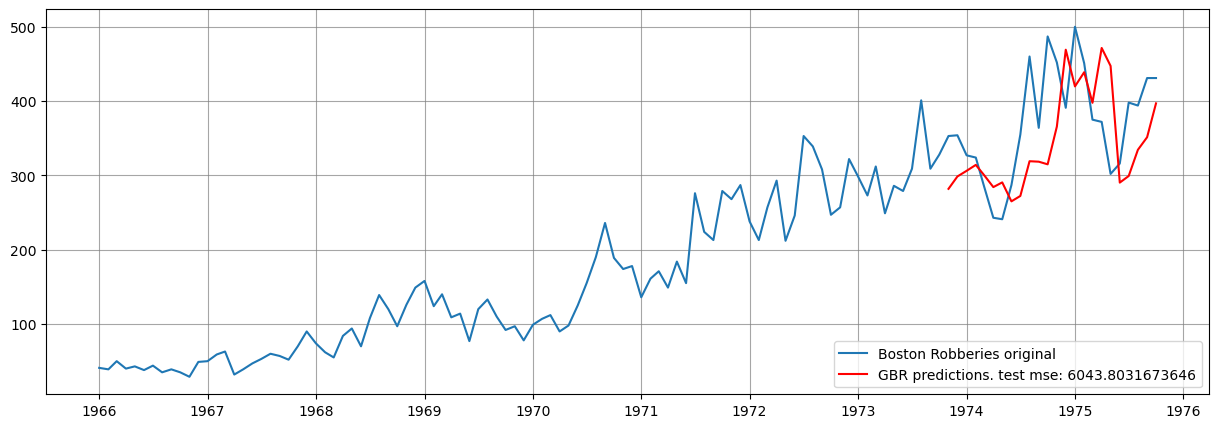

In [365]:
fig, (ax0) = plt.subplots(1, 1, figsize = (15, 5))
ax0.grid(color = 'grey', alpha = 0.7, label = 'Inline Label')
ax0.plot(robberies2['Count'], label = 'Boston Robberies original')
ax0.plot(robberies2['gbr_predicted'], label = f'GBR predictions. test mse: {mse}', color = 'red')
ax0.legend(loc = 'lower right')
plt.show()